In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
cancer = load_breast_cancer()

In [6]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [7]:
features = pd.DataFrame(cancer.data, columns=cancer.feature_names)
target = pd.DataFrame(cancer.target, columns=["TARGET"])

In [8]:
data = pd.concat([features,target], axis=1)

In [15]:
#data

In [17]:
correlation = data.corr('pearson')
correlation["TARGET"].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

In [18]:
X = data["worst concave points"]
Y = data["TARGET"]

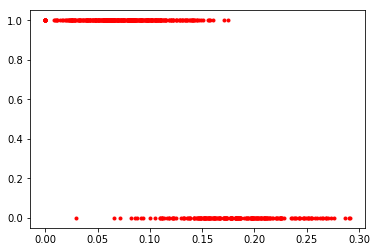

In [22]:
plt.plot(X,Y,"r.")

In [23]:
X =(X-X.min())/(X.max()-X.min())

In [26]:
x =np.array(X)
y = np.array(Y)

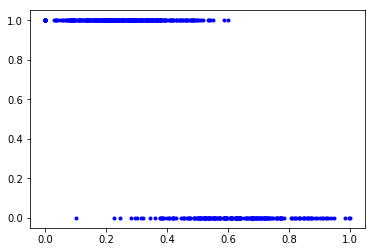

In [31]:
plt.plot(X,Y,'b.')

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [39]:
def hypothesis(a,x,b):
    return (1/(1+np.exp(-(a*x +b))))

In [40]:
def error(a,x,b,y):
    e = 0
    m = len(x)
    for i in range(m):
        e += (-y[i]*np.log(hypothesis(a,x[i],b))) - ((1 - y[i])*np.log(1 - hypothesis(a,x[i],b)))
    return (1/m)*e    

In [59]:
def step_gradient(a,b,x,y,learning_rate):
    grad_a = 0
    grad_b = 0
    m = len(x)
    for i in range(m):
        grad_a += (hypothesis(a,x[i],b) - y[i]) * x[i]
        grad_b += (hypothesis(a,x[i],b) - y[i])
    
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    
    return a, b 

In [60]:
def descend(init_a,x,init_b,y,learning_rate,iterations):
    a = init_a
    b = init_b
    for i in range(iterations):
        e = error(a, x, b ,y)
        if i % 1000 == 0:
            print(f"Error: {e}, a: {a}, b: {b}")
        
        a, b = step_gradient(a, b, x, y, learning_rate)

    return a, b

In [72]:
# init_a = 0
# init_b = 0
iterations = 10000
learning_rate = 0.005
final_a,final_b = descend(final_a,x_train,final_b,y_train,learning_rate,iterations)

Error: 0.24136462858735974, a: -16.789353927786227, b: 7.573431439571139
Error: 0.24136462858735974, a: -16.789353927786227, b: 7.573431439571139
Error: 0.24136462858735974, a: -16.789353927786227, b: 7.573431439571139
Error: 0.24136462858735974, a: -16.789353927786227, b: 7.573431439571139


KeyboardInterrupt: 

In [62]:
error(final_a,x_train,final_b,y_train)


0.24136462858735974

In [63]:
error(final_a,x_test,final_b,y_test)

0.14057361482042657

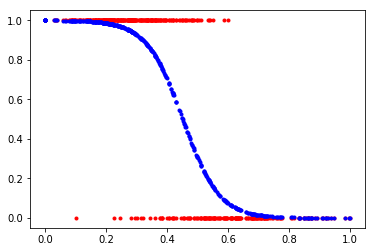

In [64]:
plt.plot(x_train,y_train,"r.",
        x_train,hypothesis(final_a,x_train,final_b),"b.")

In [68]:
def accuracy(a,x,b,y):
    correct = 0
    m = len(x)
    for i in range(m):
        pred = hypothesis(a,x[i],b)
        
        if pred > 0.5:
            z = 1
        else:
            z = 0
        if y[i] == z:
            correct += 1
    print(f"Accuracy:{correct/len(y)}")       

In [71]:
accuracy(final_a,x_test,final_b,y_test)

Accuracy:0.9473684210526315
